In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\HP\projects_cv\project\EURUSD_Candlestick_4_Hour_ASK_05.05.2003-16.10.2021.csv")

#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()


Gmt time    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [4]:
df

Gmt time     open     high      low    close  \
0      04.05.2003 21:00:00.000  1.12354  1.12354  1.12166  1.12274   
1      05.05.2003 01:00:00.000  1.12242  1.12276  1.12067  1.12126   
2      05.05.2003 05:00:00.000  1.12139  1.12255  1.12030  1.12113   
3      05.05.2003 09:00:00.000  1.12092  1.12331  1.12049  1.12174   
4      05.05.2003 13:00:00.000  1.12194  1.12900  1.12130  1.12712   
...                        ...      ...      ...      ...      ...   
28821  15.10.2021 01:00:00.000  1.15940  1.16120  1.15938  1.16082   
28822  15.10.2021 05:00:00.000  1.16082  1.16189  1.15995  1.16034   
28823  15.10.2021 09:00:00.000  1.16033  1.16124  1.15892  1.15923   
28824  15.10.2021 13:00:00.000  1.15923  1.16103  1.15893  1.15953   
28825  15.10.2021 17:00:00.000  1.15952  1.16060  1.15933  1.16040   

            volume  
0       95533.0976  
1       93778.5996  
2       90924.6992  
3       91254.6992  
4      308003.4083  
...            ...  
28821    5738.6300  
28822   13149.6600  
28823   14914.3300  
28824   20002.5300  
28825    5620.0500  

[28826 rows x 6 columns]

# support and resistance function

In [5]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.low[i]>df1.low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.low[i]<df1.low[i-1]):
            return 0
    return 1

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.high[i]<df1.high[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.high[i]>df1.high[i-1]):
            return 0
    return 1


In [6]:
length = len(df)
high = list(df['high'])
low = list(df['low'])
close = list(df['close'])
open = list(df['open'])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001      

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and 
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and 
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
       
def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0
    
def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.high[l]-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c2 = abs(max(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c3 = min(df.open[l],df.close[l])<min(levels, key=lambda x:abs(x-df.high[l]))
    c4 = df.low[l]<min(levels, key=lambda x:abs(x-df.high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0
    
def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.low[l]-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c2 = abs(min(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c3 = max(df.open[l],df.close[l])>min(levels, key=lambda x:abs(x-df.low[l]))
    c4 = df.high[l]>min(levels, key=lambda x:abs(x-df.low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [7]:
n1=2
n2=2
backCandles=30
signal = [0] * length

for row in range(backCandles, len(df)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.high[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0



In [8]:
df['signal']=signal

In [9]:
df

Gmt time     open     high      low    close  \
0      04.05.2003 21:00:00.000  1.12354  1.12354  1.12166  1.12274   
1      05.05.2003 01:00:00.000  1.12242  1.12276  1.12067  1.12126   
2      05.05.2003 05:00:00.000  1.12139  1.12255  1.12030  1.12113   
3      05.05.2003 09:00:00.000  1.12092  1.12331  1.12049  1.12174   
4      05.05.2003 13:00:00.000  1.12194  1.12900  1.12130  1.12712   
...                        ...      ...      ...      ...      ...   
28821  15.10.2021 01:00:00.000  1.15940  1.16120  1.15938  1.16082   
28822  15.10.2021 05:00:00.000  1.16082  1.16189  1.15995  1.16034   
28823  15.10.2021 09:00:00.000  1.16033  1.16124  1.15892  1.15923   
28824  15.10.2021 13:00:00.000  1.15923  1.16103  1.15893  1.15953   
28825  15.10.2021 17:00:00.000  1.15952  1.16060  1.15933  1.16040   

            volume  signal  
0       95533.0976       0  
1       93778.5996       0  
2       90924.6992       0  
3       91254.6992       0  
4      308003.4083       0  
...            ...     ...  
28821    5738.6300       0  
28822   13149.6600       0  
28823   14914.3300       0  
28824   20002.5300       0  
28825    5620.0500       0  

[28826 rows x 7 columns]

In [10]:
df[df['signal']==2].count()

Gmt time    265
open        265
high        265
low         265
close       265
volume      265
signal      265
dtype: int64

In [11]:
df.columns = ['Local time', 'Open', 'High', 'Low', 'Close', 'Volume', 'signal']
#df=df.iloc[100:200]
df

Local time     Open     High      Low    Close  \
0      04.05.2003 21:00:00.000  1.12354  1.12354  1.12166  1.12274   
1      05.05.2003 01:00:00.000  1.12242  1.12276  1.12067  1.12126   
2      05.05.2003 05:00:00.000  1.12139  1.12255  1.12030  1.12113   
3      05.05.2003 09:00:00.000  1.12092  1.12331  1.12049  1.12174   
4      05.05.2003 13:00:00.000  1.12194  1.12900  1.12130  1.12712   
...                        ...      ...      ...      ...      ...   
28821  15.10.2021 01:00:00.000  1.15940  1.16120  1.15938  1.16082   
28822  15.10.2021 05:00:00.000  1.16082  1.16189  1.15995  1.16034   
28823  15.10.2021 09:00:00.000  1.16033  1.16124  1.15892  1.15923   
28824  15.10.2021 13:00:00.000  1.15923  1.16103  1.15893  1.15953   
28825  15.10.2021 17:00:00.000  1.15952  1.16060  1.15933  1.16040   

            Volume  signal  
0       95533.0976       0  
1       93778.5996       0  
2       90924.6992       0  
3       91254.6992       0  
4      308003.4083       0  
...            ...     ...  
28821    5738.6300       0  
28822   13149.6600       0  
28823   14914.3300       0  
28824   20002.5300       0  
28825    5620.0500       0  

[28826 rows x 7 columns]

In [12]:
def SIGNAL():
    return df.signal


In [13]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):  
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next() 
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 600e-4
            tp1 = self.data.Close[-1] + 450e-4
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 600e-4
            tp1 = self.data.Close[-1] - 450e-4
            self.sell(sl=sl1, tp=tp1)

C:\Users\HP\anaconda3\Lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [14]:
from backtesting import Backtest

bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)
stat = bt.run()
stat


C:\Users\HP\AppData\Local\Temp\ipykernel_9796\2742214445.py:3: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)


Start                                     0.0
End                                   28825.0
Duration                              28825.0
Exposure Time [%]                   89.623951
Equity Final [$]                  14024.11271
Equity Peak [$]                   14024.11271
Return [%]                          40.241127
Buy & Hold Return [%]                3.354294
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -23.948843
Avg. Drawdown [%]                    -1.30234
Max. Drawdown Duration                16991.0
Avg. Drawdown Duration                  301.5
# Trades                                198.0
Win Rate [%]                        72.222222
Best Trade [%]                       4.236873
Worst Trade [%]                     -5.627949
Avg. Trade [%]                    

In [15]:
bt.plot()

GridPlot(id='p1307', ...)

In [16]:
#Target flexible way
pipdiff = 100*1e-4 #for TP
SLTPRatio = 1 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

<Axes: >

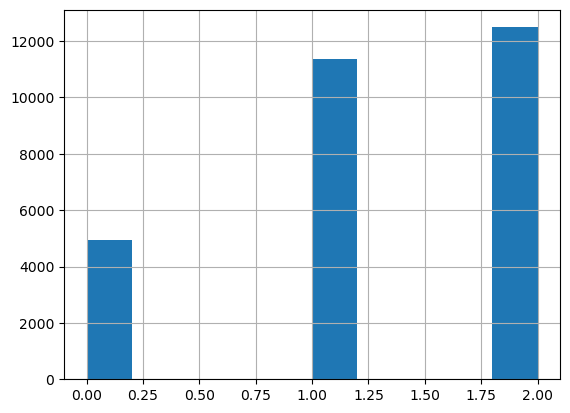

In [17]:
#!!! pitfall one category high frequency
df['Target'] = mytarget(30, df)
#df.tail(20)
#df['Target'] = df['Target'].astype(int)
df['Target'].hist()

In [18]:
import pandas_ta as pa
df["RSI"] = pa.rsi(df.Close, length=16)
df.tail(20)

Local time     Open     High      Low    Close    Volume  \
28806  12.10.2021 13:00:00.000  1.15419  1.15504  1.15254  1.15283  18731.27   
28807  12.10.2021 17:00:00.000  1.15283  1.15351  1.15244  1.15307   6749.27   
28808  12.10.2021 21:00:00.000  1.15309  1.15428  1.15292  1.15414   3025.61   
28809  13.10.2021 01:00:00.000  1.15415  1.15559  1.15409  1.15527   4160.40   
28810  13.10.2021 05:00:00.000  1.15528  1.15604  1.15457  1.15565  11030.24   
28811  13.10.2021 09:00:00.000  1.15564  1.15669  1.15363  1.15430  18650.34   
28812  13.10.2021 13:00:00.000  1.15430  1.15788  1.15405  1.15780  23598.19   
28813  13.10.2021 17:00:00.000  1.15781  1.15975  1.15780  1.15956  11188.68   
28814  13.10.2021 21:00:00.000  1.15961  1.16013  1.15925  1.15992   4511.04   
28815  14.10.2021 01:00:00.000  1.15992  1.16009  1.15890  1.15900   9698.85   
28816  14.10.2021 05:00:00.000  1.15900  1.16191  1.15880  1.16166  20309.82   
28817  14.10.2021 09:00:00.000  1.16165  1.16246  1.15979  1.16065  21356.06   
28818  14.10.2021 13:00:00.000  1.16065  1.16071  1.15842  1.15883  14886.71   
28819  14.10.2021 17:00:00.000  1.15882  1.16024  1.15847  1.15978   4598.94   
28820  14.10.2021 21:00:00.000  1.15979  1.16001  1.15882  1.15940   3051.15   
28821  15.10.2021 01:00:00.000  1.15940  1.16120  1.15938  1.16082   5738.63   
28822  15.10.2021 05:00:00.000  1.16082  1.16189  1.15995  1.16034  13149.66   
28823  15.10.2021 09:00:00.000  1.16033  1.16124  1.15892  1.15923  14914.33   
28824  15.10.2021 13:00:00.000  1.15923  1.16103  1.15893  1.15953  20002.53   
28825  15.10.2021 17:00:00.000  1.15952  1.16060  1.15933  1.16040   5620.05   

       signal  Target        RSI  
28806       0     NaN  34.119341  
28807       0     NaN  35.388781  
28808       0     NaN  40.812369  
28809       0     NaN  45.925583  
28810       0     NaN  47.550889  
28811       0     NaN  42.688668  
28812       0     NaN  55.322337  
28813       0     NaN  60.046425  
28814       0     NaN  60.947366  
28815       0     NaN  57.417952  
28816       0     NaN  63.870511  
28817       0     NaN  60.177280  
28818       0     NaN  54.157965  
28819       0     NaN  56.576331  
28820       0     NaN  55.330914  
28821       0     NaN  58.934161  
28822       0     NaN  57.268508  
28823       0     NaN  53.536217  
28824       0     NaN  54.393092  
28825       0     NaN  56.854400

In [19]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.describe())

               Open          High           Low         Close         Volume  \
count  28778.000000  28778.000000  28778.000000  28778.000000   28778.000000   
mean       1.254566      1.256617      1.252497      1.254573   83217.019202   
std        0.119543      0.119878      0.119168      0.119542  100663.619610   
min        1.036930      1.039200      1.034050      1.036970       0.380000   
25%        1.154282      1.156047      1.152175      1.154292   20405.717675   
50%        1.242525      1.244610      1.240185      1.242610   47896.140150   
75%        1.338850      1.340888      1.336688      1.338860  102535.001000   
max        1.599500      1.604030      1.596950      1.599240  752269.093800   

             signal        Target           RSI  
count  28778.000000  28778.000000  28778.000000  
mean       0.027382      1.261206     50.153443  
std        0.212251      0.733141     12.252648  
min        0.000000      0.000000     10.285452  
25%        0.000000      1.00

In [20]:
attributes = ['RSI', 'signal', 'Target']
df_model= df[attributes].copy()

df_model['signal'] = pd.Categorical(df_model['signal'])
dfDummies = pd.get_dummies(df_model['signal'], prefix = 'signalcategory')
df_model= df_model.drop(['signal'], axis=1)
df_model = pd.concat([df_model, dfDummies], axis=1)
df_model

RSI  Target  signalcategory_0  signalcategory_1  signalcategory_2
0      56.638128     2.0              True             False             False
1      61.111472     2.0              True             False             False
2      59.561496     2.0              True             False             False
3      51.638381     2.0              True             False             False
4      53.339438     2.0              True             False             False
...          ...     ...               ...               ...               ...
28773  35.436604     0.0              True             False             False
28774  38.255161     0.0              True             False             False
28775  35.137126     0.0              True             False             False
28776  37.967186     0.0              True             False             False
28777  46.148062     0.0              True             False             False

[28778 rows x 5 columns]

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']
X = df_model[attributes]
y = df_model['Target']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 50.5064%
****Test Results****
Accuracy: 33.6229%


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print("matrix_train \n ",matrix_train)
print("matrix_test \n" ,matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

matrix_train 
  [[   6  738 1278]
 [   0 3246 5332]
 [   1 2621 6922]]
matrix_test 
 [[   1  958 1976]
 [   0  879 1890]
 [   1  906 2023]]
              precision    recall  f1-score   support

         0.0       0.86      0.00      0.01      2022
         1.0       0.49      0.38      0.43      8578
         2.0       0.51      0.73      0.60      9544

    accuracy                           0.51     20144
   macro avg       0.62      0.37      0.34     20144
weighted avg       0.54      0.51      0.47     20144

              precision    recall  f1-score   support

         0.0       0.50      0.00      0.00      2935
         1.0       0.32      0.32      0.32      2769
         2.0       0.34      0.69      0.46      2930

    accuracy                           0.34      8634
   macro avg       0.39      0.34      0.26      8634
weighted avg       0.39      0.34      0.26      8634

['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']


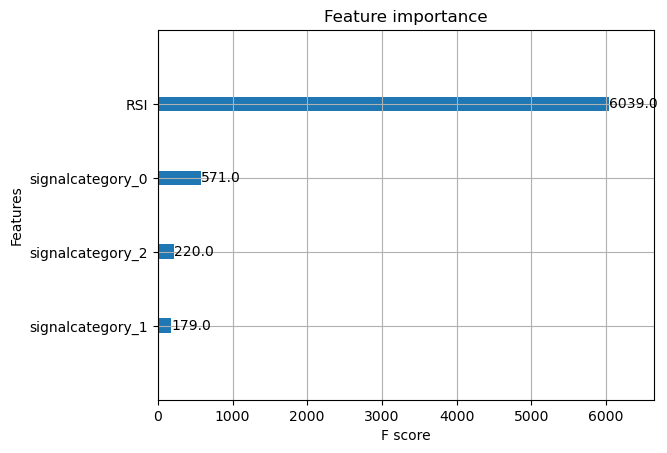

['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']


In [23]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)